In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

<center>
<h2>Carrega as imagens</h2><b>
<hr>

In [15]:
#Carrega a imagem de exemplo
#Para trocar a imagem de input comente o input atual e 

#img = cv2.imread("img/city.png",0)

#img = cv2.imread("img/baboon.png",0)
img = cv2.imread("img/butterfly.png",0)
#img = cv2.imread("img/house.png",0)
#img = cv2.imread("img/seagull.png",0)

<center>
<h2>Definição dos filtros</h2>
<hr>
</center>    
<left>
<ui>
    <li> $h_1$ = Passa-alta
    <li> $h_2$ = Passa-baixa
    <li> $h_3$ = Sobel (linhas verticais)
    <li> $h_4$ = Sobel (linhas horizontais)
</ui>

In [16]:
#filtros

h1 = np.array([[0,0,-1,0,0],
                  [0,-1,-2,-1,0],
                  [-1,-2,16,-2,-1],
                  [0,-1,-2,-1,0],
                  [0,0,-1,0,0]])

h2 = np.array([[1,4,6,4,1],
                   [4,16,24,16,4],
                   [6,24,36,24,6],
                   [4,16,24,16,4],
                   [1,4,6,4,1]])/256

h3 = np.array([[-1,0,1],
               [-2,0,2],
               [-1,0,1]])

h4 = np.array([[-1,-2,-1],
               [0,0,0],
               [1,2,1]])

<center>
<h2>Aplicação dos filtros</h2>
<hr>
</center>    

In [17]:
#convoluções
dst1 = cv2.filter2D(img, -1, h1)
dst2 = cv2.filter2D(img, -1, h2)
dst3 = cv2.filter2D(img, -1, h3)
dst4 = cv2.filter2D(img, -1, h4)

<center>
<h2>Visualização dos Resultados</h2>
<hr>
</center>    

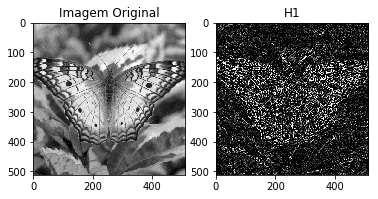

In [18]:
fig = plt.figure()

a = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(img,cmap="gray")
a.set_title('Imagem Original')

a = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(dst1,cmap="gray")
a.set_title('H1')

plt.show()

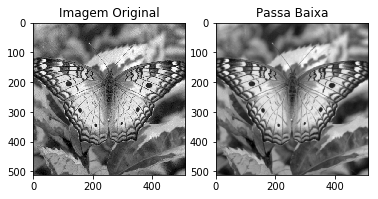

In [19]:
fig = plt.figure()

a = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(img,cmap="gray")
a.set_title('Imagem Original')

a = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(dst2,cmap="gray")
a.set_title('Passa Baixa')

plt.show()

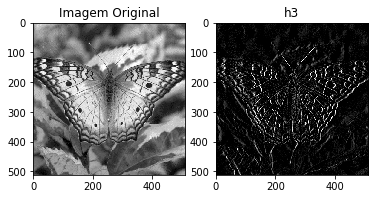

In [20]:
fig = plt.figure()

a = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(img,cmap="gray")
a.set_title('Imagem Original')

a = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(dst3,cmap="gray")
a.set_title('h3')

plt.show()

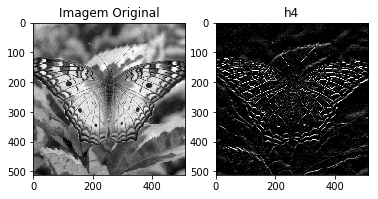

In [21]:
fig = plt.figure()

a = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(img,cmap="gray")
a.set_title('Imagem Original')

a = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(dst4,cmap="gray")
a.set_title('h4')

plt.show()

<center>
<h2>Definição do Filtro $\sqrt{(h_3)^2 + (h_4)^2}$ </h2>
<hr>
</center>    

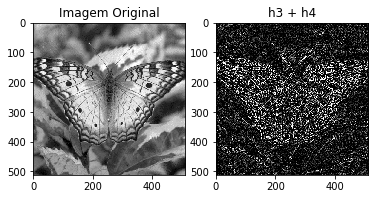

In [22]:
#Imagens temporárias
tmp1 = cv2.filter2D(img, -1, h3)
tmp2 = cv2.filter2D(img, -1, h4)

#Soma das imagens
dst5 = (tmp1**2 + tmp2**2)**0.5

#Normalização para melhor visualização
dst5 = cv2.normalize(dst1, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

#Visualização
fig = plt.figure()
a = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(img,cmap="gray")
a.set_title('Imagem Original')

a = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(dst5,cmap="gray")
a.set_title('h3 + h4')

plt.show()

<center>
<h2>Filtragem no domínio de frequência</h2>
<hr>
</center>    

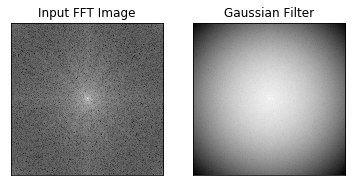

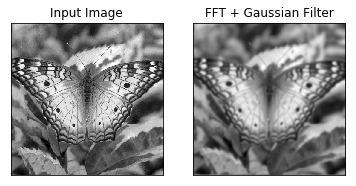

In [23]:
#converte para Fourier e desloca frequenxia-zero para centro
fshift = np.fft.fft2(img)
fshift = np.fft.fftshift(fshift)

#monta filtro gaussiano
gf  = cv2.getGaussianKernel(img.shape[0], 30)
gf = gf * gf.T


#aplica filtro
filtImg = fshift * gf

#Visualiação 
magnitude_spectrum = 20*np.log(np.abs(fshift))
magnitude_spectrum2 = 20*np.log(np.abs(filtImg))

#plt.subplot(121),plt.imshow(img, cmap = 'gray')
#plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(121),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Input FFT Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum2, cmap = 'gray')
plt.title('Gaussian Filter'), plt.xticks([]), plt.yticks([])
plt.show()

#recupera imagem
res = np.fft.ifftshift(filtImg)
res = np.fft.ifft2(res)
res = np.abs(res)

#Normaliza entre 0 - 255 
res = cv2.normalize(res, None, 0, 255, norm_type=cv2.NORM_MINMAX)

fig = plt.figure()
a = fig.add_subplot(1, 2, 1)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
imgplot = plt.imshow(img,cmap="gray")

a = fig.add_subplot(1, 2, 2)
plt.title('FFT + Gaussian Filter'), plt.xticks([]), plt.yticks([])
imgplot = plt.imshow(res,cmap="gray")
plt.show()


<center>
<h2>Salvando as imagens geradas</h2>
<hr>
</center>    

In [24]:
#Salva os resultados das filtragens
cv2.imwrite("results/h_1.png",dst1)
cv2.imwrite("results/h_2.png",dst2)
cv2.imwrite("results/h_3.png",dst3)
cv2.imwrite("results/h_4.png",dst4)
cv2.imwrite("results/h_3+h_4.png",dst5)
cv2.imwrite("results/fft.png",res)

#Salva as visualizações da FFT
cv2.imwrite("results/tmp/FFT.png",magnitude_spectrum)
cv2.imwrite("results/tmp/FFT_GF.png",magnitude_spectrum2)

True